<a href="https://colab.research.google.com/github/regonn/polar_bear/blob/master/examples/polar_bear_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/agconti/kaggle-titanic.git

Cloning into 'kaggle-titanic'...
remote: Enumerating objects: 472, done.
remote: Total 472 (delta 0), reused 0 (delta 0), pack-reused 472
Receiving objects: 100% (472/472), 7.61 MiB | 35.60 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [2]:
!pip install polar_bear

In [0]:
import numpy as np
import pandas as pd
import polar_bear as pb
import lightgbm as lgb
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
root = Path("./kaggle-titanic/data/")
train_df = pd.read_csv(root/"train.csv")
test_df = pd.read_csv(root/"test.csv")

In [0]:
cleaned_train_df, target_df, cleaned_test_df = pb.clean(train_df, test_df, 'Survived', 0.05)

In [8]:
cleaned_train_df.head()

,x1:Pclass_1,x2:Pclass_2,x3:Pclass_3,x4:Sex_female,x5:Sex_male,x6:Age_float,x7:SibSp_0,x8:SibSp_1,x9:SibSp_2,x10:SibSp_3,...,x16:Parch_2,x17:Parch_3,x18:Parch_4,x19:Parch_5,x20:Parch_6,x21:Parch_9,x22:Fare_float,x23:Embarked_C,x24:Embarked_Q,x25:Embarked_S
0,0,0,1,0,1,22.0,0,1,0,0,...,0,0,0,0,0,0,7.2500,0,0,1
1,1,0,0,1,0,38.0,0,1,0,0,...,0,0,0,0,0,0,71.2833,1,0,0
2,0,0,1,1,0,26.0,1,0,0,0,...,0,0,0,0,0,0,7.9250,0,0,1
3,1,0,0,1,0,35.0,0,1,0,0,...,0,0,0,0,0,0,53.1000,0,0,1
4,0,0,1,0,1,35.0,1,0,0,0,...,0,0,0,0,0,0,8.0500,0,0,1


In [0]:

X_train, X_test, y_train, y_test = train_test_split(cleaned_train_df.values, target_df["y1:Survived"].values, test_size=0.2, random_state=0)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [0]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': {'binary', 'binary_error', 'auc'},
        'seed': 42,
}

In [13]:
gbm = lgb.train(params, lgb_train, valid_sets=lgb_eval,
                early_stopping_rounds=10,
                feature_name=[col.split(":")[1] for col in cleaned_train_df.columns])

[1]	valid_0's binary_error: 0.385475	valid_0's auc: 0.866996	valid_0's binary_logloss: 0.624886
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_error: 0.324022	valid_0's auc: 0.868841	valid_0's binary_logloss: 0.591138
[3]	valid_0's binary_error: 0.184358	valid_0's auc: 0.885903	valid_0's binary_logloss: 0.558999
[4]	valid_0's binary_error: 0.189944	valid_0's auc: 0.886957	valid_0's binary_logloss: 0.535888
[5]	valid_0's binary_error: 0.189944	valid_0's auc: 0.88834	valid_0's binary_logloss: 0.516576
[6]	valid_0's binary_error: 0.184358	valid_0's auc: 0.887549	valid_0's binary_logloss: 0.499097
[7]	valid_0's binary_error: 0.184358	valid_0's auc: 0.887747	valid_0's binary_logloss: 0.484584
[8]	valid_0's binary_error: 0.184358	valid_0's auc: 0.88946	valid_0's binary_logloss: 0.471339
[9]	valid_0's binary_error: 0.178771	valid_0's auc: 0.889196	valid_0's binary_logloss: 0.460733
[10]	valid_0's binary_error: 0.184358	valid_0's auc: 0.892885	valid_0's bina

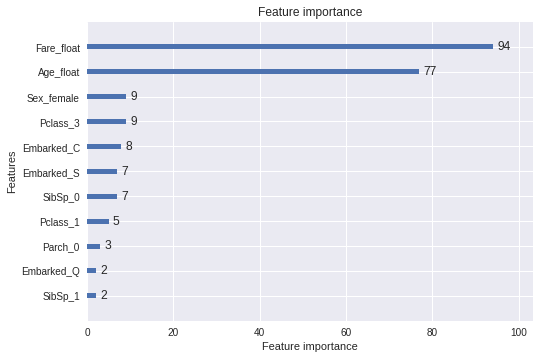

In [14]:
lgb.plot_importance(gbm)

In [0]:
y_pred = gbm.predict(cleaned_test_df.values, num_iteration=gbm.best_iteration)

In [0]:
sub = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred})

In [19]:
sub
sub.to_csv('polar_bear.csv', index = False, float_format='%1d')
sub.head()

,PassengerId,Survived
0,892,0.183579
1,893,0.436494
2,894,0.204961
3,895,0.266651
4,896,0.511526
